In [1]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('numeric_data_Kaggle.csv')

# Split the data into X (features) and y (target variable)
X = df.drop(['name', 'desc_snippet', 'genre', 'processed_desc_snippet'], axis=1)  # Features: Numeric features
y = df['genre']  # Target variable: Genre column

#Multi label classification
# Create an instance of MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the multi-label data
y_encoded = mlb.fit_transform(y)

# Print the shape of the encoded labels
print(y_encoded.shape[1])

# Get the generated class labels
genre_labels = mlb.classes_
print(genre_labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

44
[' ' '&' ',' '0' '3' '6' 'A' 'C' 'D' 'E' 'F' 'G' 'I' 'M' 'N' 'P' 'R' 'S'
 'T' 'U' 'V' 'W' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'l' 'm' 'n' 'o' 'p'
 'r' 's' 't' 'u' 'v' 'w' 'x' 'y']


In [2]:
# Create an instance of the base classifier (e.g., RandomForestClassifier)
base_classifier = RandomForestClassifier()

# Create an instance of MultiOutputClassifier and pass the base classifier
multi_output_classifier = MultiOutputClassifier(base_classifier)

# Fit the multi-output classifier on the training data
multi_output_classifier.fit(X_train, y_train)

# Make predictions using the trained multi-output classifier
y_pred = multi_output_classifier.predict(X_test)

# Evaluate the performance of the multi-output classifier
# You can use appropriate evaluation metrics based on your problem, such as accuracy, F1-score, etc.
accuracy = multi_output_classifier.score(X_test, y_test)

# Compare Predictions with Actual Labels
# Compare the predicted labels (y_pred) with the actual labels (y_test) to see where the model's predictions match or differ from the ground truth.
comparison = pd.DataFrame({'Actual': mlb.inverse_transform(y_test),
                           'Predicted': mlb.inverse_transform(y_pred)})
print(comparison)
print(accuracy)

                                                 Actual  \
0     (,, A, C, I, S, a, d, e, g, i, l, m, n, o, r, ...   
1                     (,, C, I, a, d, e, i, l, n, s, u)   
2                  (,, I, S, a, d, e, g, i, n, r, t, y)   
3                                 (S, a, e, g, r, t, y)   
4               (,, A, I, c, d, e, i, n, o, r, t, u, v)   
...                                                 ...   
1995      (,, C, I, S, a, d, e, i, l, m, n, o, s, t, u)   
1996            (,, A, I, c, d, e, i, n, o, r, t, u, v)   
1997  (,, A, C, G, I, P, R, a, c, d, e, i, l, n, o, ...   
1998            (,, I, S, a, d, e, i, l, m, n, o, t, u)   
1999            (,, A, I, R, a, c, d, e, g, i, n, o, t)   

                                              Predicted  
0     (,, A, I, S, a, c, d, e, i, l, n, o, r, t, u, ...  
1                     (,, C, I, a, d, e, i, l, n, s, u)  
2      (,, A, I, S, a, c, d, e, g, i, n, o, r, t, u, y)  
3            (,, A, C, I, a, d, e, i, l, n, r, t, u, v)  
4

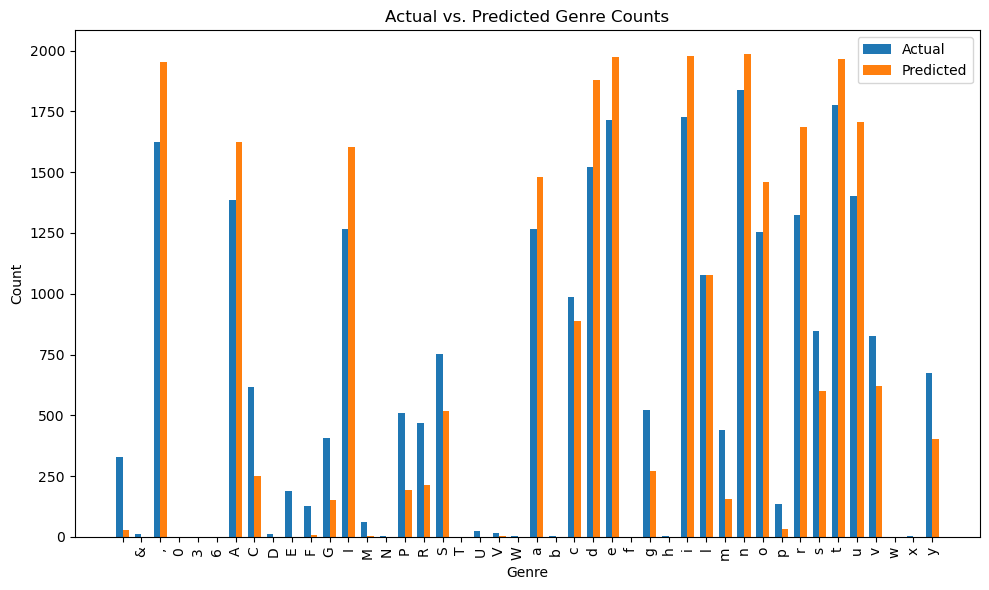

In [3]:
# Count the occurrences of each genre in the actual and predicted labels
actual_counts = np.sum(y_test, axis=0)
predicted_counts = np.sum(y_pred, axis=0)

# Create the positions for the bars
bar_width = 0.35
index = np.arange(len(genre_labels))

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Actual vs. Predicted Genre Counts')
plt.legend()
plt.xticks(index + bar_width / 2, genre_labels, rotation=90)
plt.tight_layout()
plt.show()